In [ ]:

import os
#Connecting Google Drive Data Files to Google Colab Notebook
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/My Package')

FileNotFoundError: ignored

In [ ]:
import methods as mth

In [ ]:
mth.add_num(9,10)

19

**Installation of required Packages and libraries**

In [ ]:
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install pycountry
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

     |████████████████████████████████| 981 kB 14.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4a44c4e5e2981429e577702ab1a17160f26974f769ab9c2e7e752f0dc2ba1b05
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 10.1 MB 13.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7f5eec0a14fb70aeb53025f31cabbbfeb4f590a666eed4f4efd5cab57986a93f
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

**Extracting Twitter data with API**


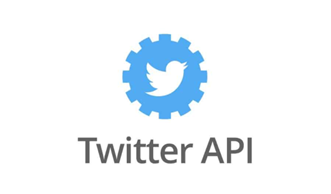

In [ ]:
consumer_key="xebmrrBFoA1PUEMqMZyPAs7WZ"
consumer_secret="UAji77LrCfleFXtBaVwQxsuGTVJJUeK2wnB0kgiF0DZSIOWQcv"
access_token="933264924872130560-ZFENO7Styjd4FTb6jEIbgnO8QiASGqT"
access_token_secret="xI1VtW0Oh3FisRmag2qO45XSEAQGAE3c7oUcOnqAIYCKl"

import tweepy
from time import sleep

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)


**Using Vader from NLTK for Sentiment Analysis**

In [ ]:
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword+" -filter:retweets").items(noOfTweet)

tweet_list = []

for tweet in tweets:
  tweet_list.append(tweet.text)

Please enter keyword or hashtag to search: #Ukrainewar
Please enter how many tweets to analyze: 100


In [ ]:
tweet_list = pd.DataFrame(tweet_list)

In [ ]:
tweet_list

,0
0,@renaultgroup @SignatechAlpine #UkraineRussian...
1,Một #video được cho là quay từ #Kramatorsk.\n\...
2,#UkraineWar #karkiv #Zoo #Zelenskyy #Poutine #...
3,More footage showing the #Ukrainian army suppo...
4,💔💔💔\n#StopRussianAggression #StandWithUkriane ...
...,...
95,@andersostlund @Klitschko #UkraineWar #Zelensk...
96,@Amnesty_UA @witnessorg @bellingcat @Shayan86 ...
97,ZELENSKYY: AT WHAT POINT DOES CONTINUED WAR BE...
98,Oleksandr Usyk offered chance to leave Ukraine...


In [ ]:
mapping = {tweet_list.columns[0]: 'tweets'}
tweets_final_change = tweet_list.rename(columns=mapping)
display(tweets_final_change)

,tweets
0,@renaultgroup @SignatechAlpine #UkraineRussian...
1,Một #video được cho là quay từ #Kramatorsk.\n\...
2,#UkraineWar #karkiv #Zoo #Zelenskyy #Poutine #...
3,More footage showing the #Ukrainian army suppo...
4,💔💔💔\n#StopRussianAggression #StandWithUkriane ...
...,...
95,@andersostlund @Klitschko #UkraineWar #Zelensk...
96,@Amnesty_UA @witnessorg @bellingcat @Shayan86 ...
97,ZELENSKYY: AT WHAT POINT DOES CONTINUED WAR BE...
98,Oleksandr Usyk offered chance to leave Ukraine...


In [ ]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")

    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")

    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

    return tweets

In [ ]:
tweets_final_change['tweets'] = clean_tweets(tweets_final_change['tweets'])
tweets_final_change['tweets'].head()

0      #UkraineRussianWar #UkraineWar #Ukraine️ #Ru...
1    Một #video được cho là quay từ #Kramatorsk.\n\...
2    #UkraineWar #karkiv #Zoo #Zelenskyy #Poutine #...
3    More footage showing the #Ukrainian army suppo...
4    💔💔💔\n#StopRussianAggression #StandWithUkriane ...
Name: tweets, dtype: object

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(tweets_final_change['tweets'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['tweets'][i]))
    compound = analyzer.polarity_scores(tweets_final_change['tweets'][i])["compound"]
    pos = analyzer.polarity_scores(tweets_final_change['tweets'][i])["pos"]
    neu = analyzer.polarity_scores(tweets_final_change['tweets'][i])["neu"]
    neg = analyzer.polarity_scores(tweets_final_change['tweets'][i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
tweets_final_change = tweets_final_change.join(sentiments_score)
tweets_final_change.head()

,tweets,Compound,Positive,Negative,Neutral
0,#UkraineRussianWar #UkraineWar #Ukraine️ #Ru...,0.0,0.0,0.0,1.0
1,Một #video được cho là quay từ #Kramatorsk.\n\...,0.0,0.0,0.0,1.0
2,#UkraineWar #karkiv #Zoo #Zelenskyy #Poutine #...,0.0,0.0,0.0,1.0
3,More footage showing the #Ukrainian army suppo...,0.0,0.0,0.0,1.0
4,💔💔💔\n#StopRussianAggression #StandWithUkriane ...,0.0,0.0,0.0,1.0


In [ ]:
#negative_list["Sentiment"] = 2
#positive_list["Sentiment"] = 1
#neutral_list["Sentiment"] = 0

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(tweets_final_change['tweets'][tweets_final_change['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['China',
 'XiJingping',
 'Ukraine',
 'Russia',
 'Russian',
 'UkraineRussiaWar',
 'Anonymous',
 'Hackers',
 'AnonymousStandsWithUkraine',
 'UkraineWar']

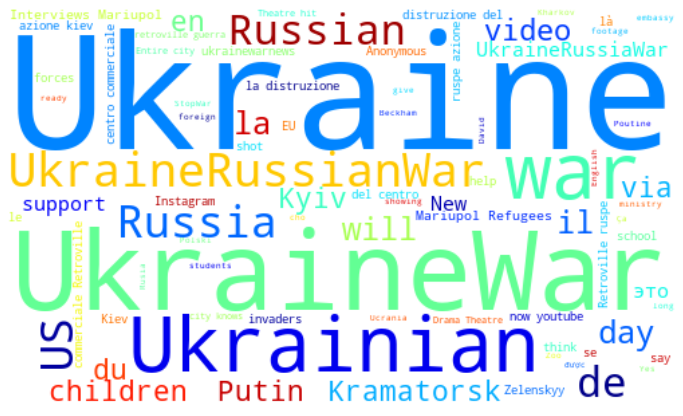

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=500,
        height=300,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(tweets_final_change['tweets'])

Second Part - Heat Map

In [ ]:
def percentage(part,whole):
    return 100*float(part)/float(whole)


#Credentials for Twitter App. Get Your from apps.twitter.com

consumer_key="xebmrrBFoA1PUEMqMZyPAs7WZ"
consumer_secret="UAji77LrCfleFXtBaVwQxsuGTVJJUeK2wnB0kgiF0DZSIOWQcv"
access_token="933264924872130560-ZFENO7Styjd4FTb6jEIbgnO8QiASGqT"
access_token_secret="xI1VtW0Oh3FisRmag2qO45XSEAQGAE3c7oUcOnqAIYCKl"




#Establishing the connection

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))


ids=[]
Time=[]
Text=[]
Name=[]
Screen_name=[]
Location=[]
Friends_count=[]
Followers_count=[]


for tweet in tweepy.Cursor(api.search,q=searchTerm+" -filter:retweets",lang="en",since="2022-02-27",result_type='popular').items(noofsearchTerms/2):
    ids.append(tweet.user.id)
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Screen_name.append(tweet.user.screen_name)
    Location.append(tweet.user.location)
    Friends_count.append(tweet.user.friends_count)
    Followers_count.append(tweet.user.followers_count)


for tweet in tweepy.Cursor(api.search,q=searchTerm,lang="en",since="2015-01-01").items(noofsearchTerms/2):
    ids.append(tweet.user.id)
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Screen_name.append(tweet.user.screen_name)
    Location.append(tweet.user.location)
    Friends_count.append(tweet.user.friends_count)
    Followers_count.append(tweet.user.followers_count)


d={
    'ids':ids,
    'Time':Time,
    'Text':Text,
    'Name':Name,
    'Screen_Name':Screen_name,
    'Location':Location,
    'Friends_count':Friends_count,
    'Followers_count':Followers_count
}

df=pd.DataFrame(d)

Enter the keyword/Hashtag to search about :#Ukrainewar
Enter the no. of tweets to analyze :100


In [ ]:
#Sorting Values By Followers Count to Find out the top Influencers who are INfluencing the topic

df.sort_values(by='Followers_count',inplace=True,ascending=False)
df['Sentiment']=0
noofTerms=df.shape[0]
df.head()

,ids,Time,Text,Name,Screen_Name,Location,Friends_count,Followers_count,Sentiment
6,14216661,2022-03-22 00:35:26,Russian defence ministry lets slip that almost...,National Post,nationalpost,Canada,185,955769,0
0,431071870,2022-03-21 19:36:16,Ukrainians aren’t just fighting for Ukraine.\n...,Matthew VanDyke,Matt_VanDyke,,307138,437120,0
12,431071870,2022-03-20 19:36:17,The mass mobilization of Ukrainians to defend ...,Matthew VanDyke,Matt_VanDyke,,307138,437120,0
25,19902709,2022-03-16 13:11:50,"Zelenskyy: RememberPearl Harbour, remember Sep...",Beth Rigby,BethRigby,,2262,384921,0
1,14106476,2022-03-21 09:36:28,"Finally, #America has a president everybody lo...",KyivPost,KyivPost,"#Kyiv, #Ukraine",1573,367731,0


In [ ]:
positive=0
negative=0
neutral=0
polarity=0

for i,tweet in enumerate(df['Text']):
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        df['Sentiment'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        df['Sentiment'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        df['Sentiment'][i]=0


#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')


print("How people are reacting on "+ searchTerm +" by analyzing  "+" tweets.")

if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")


How people are reacting on #Ukrainewar by analyzing   tweets.
Overall Polarity is Positive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.head()

,ids,Time,Text,Name,Screen_Name,Location,Friends_count,Followers_count,Sentiment
6,14216661,2022-03-22 00:35:26,Russian defence ministry lets slip that almost...,National Post,nationalpost,Canada,185,955769,0
0,431071870,2022-03-21 19:36:16,Ukrainians aren’t just fighting for Ukraine.\n...,Matthew VanDyke,Matt_VanDyke,,307138,437120,0
12,431071870,2022-03-20 19:36:17,The mass mobilization of Ukrainians to defend ...,Matthew VanDyke,Matt_VanDyke,,307138,437120,1
25,19902709,2022-03-16 13:11:50,"Zelenskyy: RememberPearl Harbour, remember Sep...",Beth Rigby,BethRigby,,2262,384921,1
1,14106476,2022-03-21 09:36:28,"Finally, #America has a president everybody lo...",KyivPost,KyivPost,"#Kyiv, #Ukraine",1573,367731,1


In [ ]:
export_csv = df.to_csv (r'./tweets.csv', header=True)

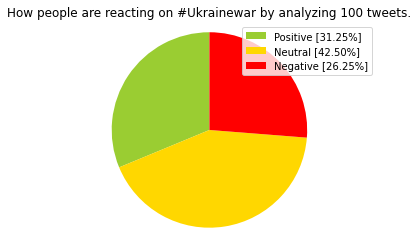

In [ ]:
#Visualization
labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.show();

In [ ]:
import sys
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

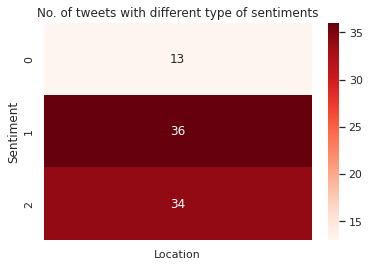

In [ ]:
plt.title("No. of tweets with different type of sentiments")
sns.heatmap(df.groupby('Sentiment')[['Location']].count(),fmt="d", annot=True, cmap='Reds')

In [ ]:
ukraine_map = gpd.read_file("/content/UKR_adm1.shp")
stats=pd.read_csv("/content/tweets.csv")

NameError: ignored

In [ ]:
map_and_stats=ukraine_map.merge(stats, on="Text")

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags

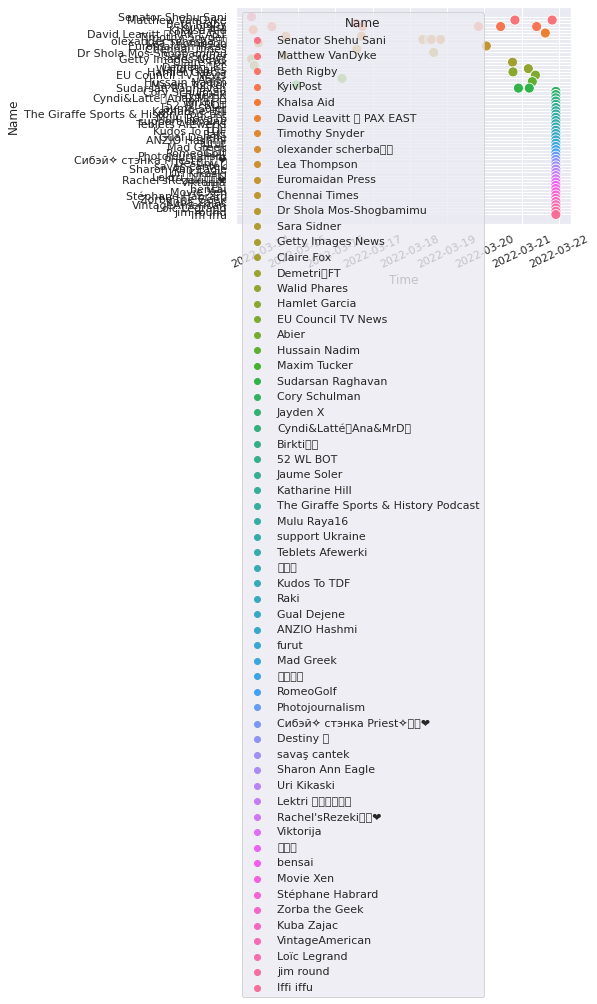

In [ ]:
sns.scatterplot(df['Time'],df['Name'],hue=df['Name'],s=100)
plt.xlabel('Time')
plt.ylabel('Name')
plt.xticks(rotation=25);

In [ ]:
sentiment_tweet= df.groupby('Sentiment')[['Text']].count()
sentiment_tweet

,Text
Sentiment,
0,13
1,36
2,34


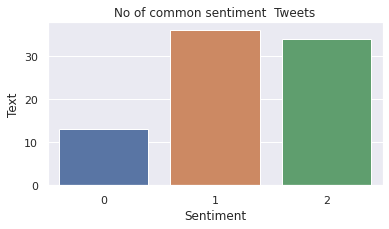

In [ ]:
sentiment_tweet['Sentiment'] =sentiment_tweet.index

plt.figure(figsize=(6,3))

plt.title('No of common sentiment  Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Text')
sns.barplot(x='Sentiment',y='Text',data=sentiment_tweet);